# Basics of Keras in Tensorflow

In [37]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

* The data is custom made for a hypotethical clinical new drug test in 2100 individuals which consists a group of people who are younger than 65 years of age and another group with equal number of people who are 65 years of age or older.
* Around 95% of patients who are 65 and older exprienced side effects.
* Around 95% of pateints who are under 65 years of age experienced no side effects.


In [38]:
X = [] # input data
Y = [] # label

In [39]:
# Creating the outliers
total_patients = 2100
no_of_outliers = int(5 / 100 * total_patients)
print(no_of_outliers)
for i in range(no_of_outliers):
    # ~5% of young patients who experienced side effects.
    random_young_age_patient = randint(13, 64)
    X.append(random_young_age_patient)
    Y.append(1)
    
    # ~5% of old patients who did not experience side effects
    random_old_age_patient = randint(65, 100)
    X.append(random_old_age_patient)
    Y.append(0)

105


In [40]:
# Rest of patients apart from outliers
no_of_non_outliers = 2100 - no_of_outliers
for i in range(no_of_non_outliers):
    # ~95% of young patients who did not experience side effetcs.
    random_young_age_patient = randint(13, 64)
    X.append(random_young_age_patient)
    Y.append(0)
    
    # ~95% of old patients who experienced side effects.
    random_old_age_patient = randint(65, 100)
    X.append(random_old_age_patient)
    Y.append(1)

In [41]:
# Converting the lists to np arrays.
X = np.array(X)
Y = np.array(Y)
X, Y = shuffle(X, Y)

In [42]:
X_test = []
Y_test = []

for i in range(50):
    # ~5% of young patients who experienced side effects.
    random_young_age_patient = randint(13, 64)
    X_test.append(random_young_age_patient)
    Y_test.append(1)
    
    # ~5% of old patients who did not experience side effects
    random_old_age_patient = randint(65, 100)
    X_test.append(random_old_age_patient)
    Y_test.append(0)

for i in range(950):
    # ~95% of young patients who did not experience side effetcs.
    random_young_age_patient = randint(13, 64)
    X_test.append(random_young_age_patient)
    Y_test.append(0)
    
    # ~95% of old patients who experienced side effects.
    random_old_age_patient = randint(65, 100)
    X_test.append(random_old_age_patient)
    Y_test.append(1)

In [43]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test, Y_test = shuffle(X_test, Y_test)

In [44]:
scaler = MinMaxScaler(feature_range = (0, 1))
# data should not be 1D for fit_transfor
scaled_X = scaler.fit_transform(X.reshape(-1, 1))
scaled_X_test = scaler.fit_transform(X_test.reshape(-1, 1))

### Simple tf.keras Sequnetial Model

In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [46]:
physical_devices = tf.config.experimental.list_logical_devices('GPU')
print("No Of GPUs = ", len(physical_devices))
if len(physical_devices) != 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

No Of GPUs =  0


In [47]:
# Creating Fully Connected Layers. 
model = Sequential([
    Dense(units = 16, input_shape = (1, ), activation = 'relu'),
    Dense(units = 32, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')
])

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics= ['accuracy'])

In [50]:
model.fit(x=scaled_X, y=Y, batch_size=10, validation_split = 0.1, epochs=30, shuffle = True, verbose=2)

Epoch 1/30
378/378 - 1s - loss: 0.5010 - accuracy: 0.7854 - val_loss: 0.3078 - val_accuracy: 0.9190
Epoch 2/30
378/378 - 0s - loss: 0.2834 - accuracy: 0.9251 - val_loss: 0.2683 - val_accuracy: 0.9500
Epoch 3/30
378/378 - 0s - loss: 0.2660 - accuracy: 0.9354 - val_loss: 0.2595 - val_accuracy: 0.9238
Epoch 4/30
378/378 - 0s - loss: 0.2599 - accuracy: 0.9376 - val_loss: 0.2587 - val_accuracy: 0.9381
Epoch 5/30
378/378 - 0s - loss: 0.2563 - accuracy: 0.9410 - val_loss: 0.2491 - val_accuracy: 0.9500
Epoch 6/30
378/378 - 0s - loss: 0.2529 - accuracy: 0.9429 - val_loss: 0.2451 - val_accuracy: 0.9381
Epoch 7/30
378/378 - 0s - loss: 0.2508 - accuracy: 0.9386 - val_loss: 0.2434 - val_accuracy: 0.9262
Epoch 8/30
378/378 - 0s - loss: 0.2489 - accuracy: 0.9442 - val_loss: 0.2433 - val_accuracy: 0.9500
Epoch 9/30
378/378 - 0s - loss: 0.2481 - accuracy: 0.9423 - val_loss: 0.2391 - val_accuracy: 0.9381
Epoch 10/30
378/378 - 0s - loss: 0.2460 - accuracy: 0.9386 - val_loss: 0.2405 - val_accuracy: 0.9500

### Predict

In [51]:
prediction = model.predict(x=scaled_X_test, batch_size=10, verbose=0)

In [52]:
for i in prediction[::50]:
    print(i)

[0.05166224 0.9483378 ]
[0.95879525 0.04120478]
[0.05166224 0.9483378 ]
[0.03774094 0.96225905]
[0.9576182  0.04238185]
[0.04148823 0.9585118 ]
[0.0770683 0.9229317]
[0.9573789  0.04262109]
[0.9584314  0.04156856]
[0.06032959 0.93967044]
[0.9578561  0.04214388]
[0.04281465 0.9571854 ]
[0.9576182  0.04238185]
[0.9574987  0.04250131]
[0.0682247 0.9317753]
[0.04704108 0.95295894]
[0.0567103  0.94328964]
[0.947011   0.05298905]
[0.94409746 0.05590258]
[0.9484134 0.0515866]
[0.9566534  0.04334657]
[0.03656569 0.9634343 ]
[0.9344289  0.06557114]
[0.06032959 0.93967044]
[0.03431999 0.96568   ]
[0.94557256 0.05442743]
[0.0584937  0.94150627]
[0.3481985  0.65180147]
[0.04020118 0.9597988 ]
[0.9574987  0.04250131]
[0.0567103  0.94328964]
[0.9578561  0.04214388]
[0.95611674 0.04388325]
[0.9583282  0.04167179]
[0.93614185 0.06385813]
[0.9378131  0.06218692]
[0.9484134 0.0515866]
[0.952413   0.04758706]
[0.079438   0.92056197]
[0.9584314  0.04156856]


In [53]:
rounded_pred = np.argmax(prediction, axis=-1)

In [54]:
for i in rounded_pred[::50]:
    print(i)

1
0
1
1
0
1
1
0
0
1
0
1
0
0
1
1
1
0
0
0
0
1
0
1
1
0
1
1
1
0
1
0
0
0
0
0
0
0
1
0


## Confusion Matrix

In [55]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [56]:
cm = confusion_matrix(y_true= Y_test, y_pred=rounded_pred)

In [57]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[950  50]
 [ 50 950]]


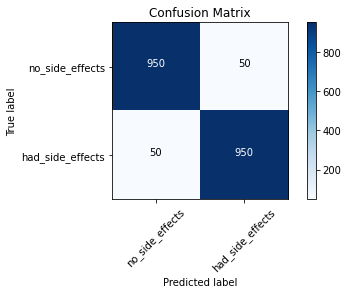

In [58]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### Saving a model

In [59]:
import os.path
# Only save a model.
if not os.path.isfile('models/medical_trail.h5'):
    model.save('models/medical_trail.h5')